In [1]:
#In this case study, we're going to look at dimensionality reduction
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

In [2]:
#1: PCA for Visualization

In [3]:
#Let's import the digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
#We'll project this from 64-dim to 2-dim via PCA
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


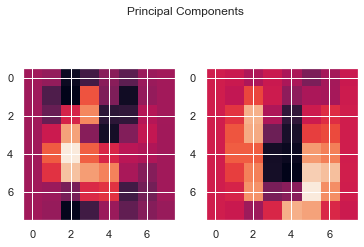

In [5]:
#Let's visualize the first 2 principal components
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Principal Components')
ax1.imshow(np.reshape(pca.components_[0],(8,8)))
ax2.imshow(np.reshape(pca.components_[1],(8,8)))

Text(0, 0.5, '2-dim\nreconstruction')

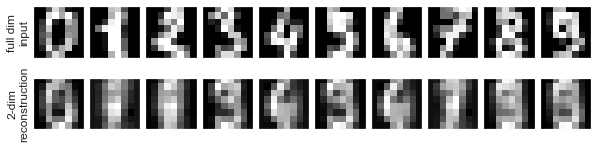

In [6]:
#Let's visualize what the figures look like, projected on to the 2-dim subspace of R^64
inv_proj = pca.inverse_transform(projected)
fig, ax = plt.subplots(2,10,figsize=(10,2.5),subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0,i].imshow(digits.data[i].reshape(8,8),cmap='binary_r')
    ax[1,i].imshow(inv_proj[i].reshape(8,8), cmap='binary_r')
    
ax[0,0].set_ylabel('full dim\ninput')
ax[1,0].set_ylabel('2-dim\nreconstruction')

In [43]:
#Challenge 1: Fit a decision tree (max_depth 20) to the 2D PROJECTED data. How does the accuracy compare to the model
#trained on the full data set? Remember to use a train-test split. What if we used 10 PCA components?

In [62]:
#Decision tree on original data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = digits.data
y = digits.target
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state =0)
tree_clf = DecisionTreeClassifier(max_depth = 20)
tree_clf.fit(Xtrain,ytrain)
ypred=tree_clf.predict(Xtest)
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        40
           1       0.88      0.86      0.87        44
           2       0.86      0.83      0.84        46
           3       0.82      0.73      0.77        51
           4       0.84      0.89      0.86        36
           5       0.88      0.88      0.88        48
           6       0.94      1.00      0.97        49
           7       0.81      0.95      0.88        41
           8       0.81      0.91      0.86        43
           9       0.81      0.73      0.77        52

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



In [60]:
#Challenge 1: Using 2D PCA data
pca = PCA(2)
X = pca.fit_transform(digits.data)
y = digits.target
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state =0)
tree_clf = DecisionTreeClassifier(max_depth = 20)
tree_clf.fit(Xtrain,ytrain)
ypred=tree_clf.predict(Xtest)
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.49      0.42      0.45        50
           2       0.57      0.60      0.58        42
           3       0.56      0.62      0.59        40
           4       0.68      0.79      0.73        33
           5       0.19      0.19      0.19        48
           6       0.83      0.77      0.80        56
           7       0.58      0.55      0.57        51
           8       0.19      0.20      0.19        45
           9       0.60      0.57      0.58        49

    accuracy                           0.55       450
   macro avg       0.56      0.56      0.56       450
weighted avg       0.55      0.55      0.55       450



In [63]:
#Challenge 1: Using 10D PCA data, about as good using all components
pca = PCA(10)
X = pca.fit_transform(digits.data)
y = digits.target
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state =0)
tree_clf = DecisionTreeClassifier(max_depth = 20)
tree_clf.fit(Xtrain,ytrain)
ypred=tree_clf.predict(Xtest)
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        41
           1       0.79      0.92      0.85        37
           2       0.80      0.80      0.80        44
           3       0.73      0.73      0.73        45
           4       0.92      1.00      0.96        35
           5       0.85      0.84      0.85        49
           6       0.94      0.91      0.92        54
           7       0.88      0.91      0.89        46
           8       0.73      0.78      0.75        45
           9       0.77      0.67      0.71        54

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.83       450



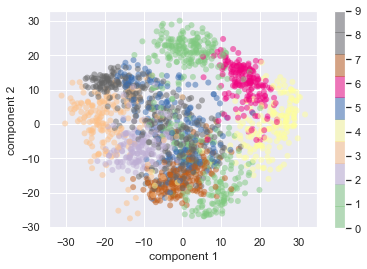

In [7]:
#Let's plot the 2-d projection
plt.scatter(projected[:,0], projected[:,1], c = digits.target, edgecolor='none', alpha = 0.5, cmap=plt.cm.get_cmap('Accent',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Text(0, 0.5, 'cumulative explained variance')

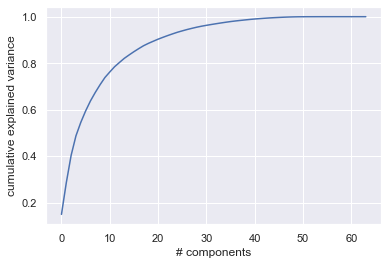

In [8]:
#Finally, we plot the cumulative sum of the explained variance
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

In [9]:
#2: PCA as Noise Filtering

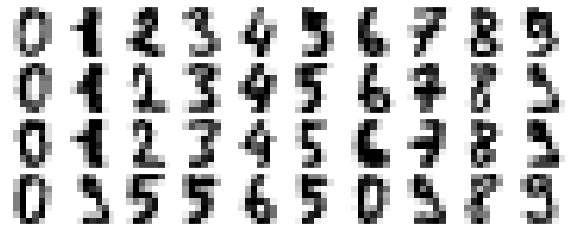

In [10]:
#Let's plot some of the figures...
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4),subplot_kw = {'xticks':[], 'yticks':[]},
                            gridspec_kw = dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap = 'binary', interpolation='nearest', clim=(0,16))
plot_digits(digits.data)

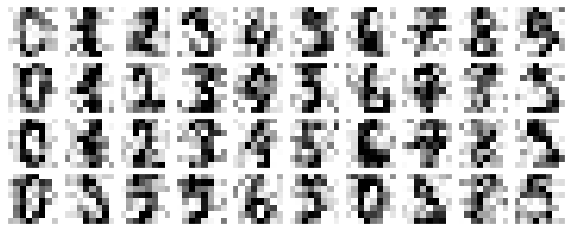

In [11]:
#Now we'll add some noise and plot the results.
np.random.seed(42)
noisy = np.random.normal(digits.data,4)
plot_digits(noisy)

In [12]:
#We now fit pca to get 50% of the explained variance, which happens to require 12 principal components
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

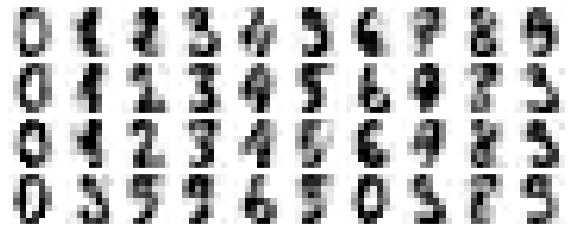

In [13]:
#Let's see what we get...not bad!
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [14]:
#Challenge 2: Try the noise experiment on the part of the dataset consisting only of '2's. Do you get better reconstruction
#with a single digit or with the full dataset?

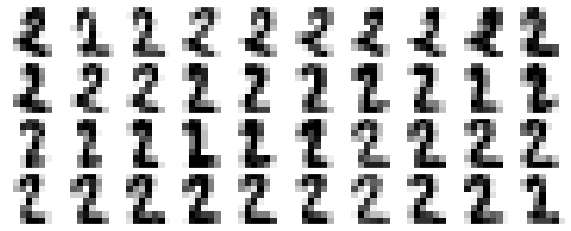

In [74]:
#Challenge 2
#Let's build the data set of 2s
digits_two = [digits.data[i] for i in range(len(digits.data)) if digits.target[i]==2]
#Let's plot some of the figures...
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4),subplot_kw = {'xticks':[], 'yticks':[]},
                            gridspec_kw = dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap = 'binary', interpolation='nearest', clim=(0,16))
plot_digits(digits_two)

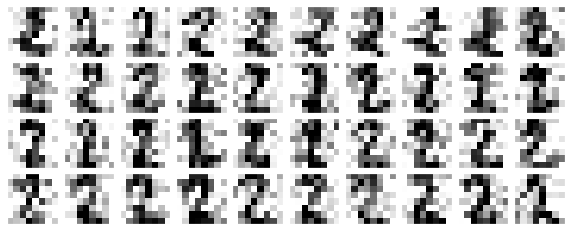

In [76]:
#Challenge 2
#Now we'll add some noise to the 2s and plot the results.
np.random.seed(42)
noisy_twos = np.random.normal(digits_two,4)
plot_digits(noisy_twos)

In [79]:
#Challenge 2
#We now fit pca to get 50% of the explained variance, which happens to require 11 principal components
pca = PCA(0.50).fit(noisy_twos)
pca.n_components_

11

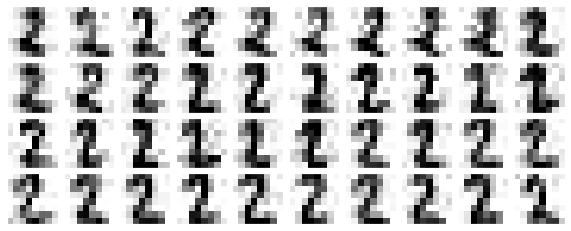

In [80]:
#Challenge 2
#Let's see what we get... better!
components = pca.transform(noisy_twos)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [15]:
#Let's use PCA on a set of images of famous people
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Lleyton Hewitt']
(845, 62, 47)


In [16]:
#We'll use RandomizedPCA to speed things up
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

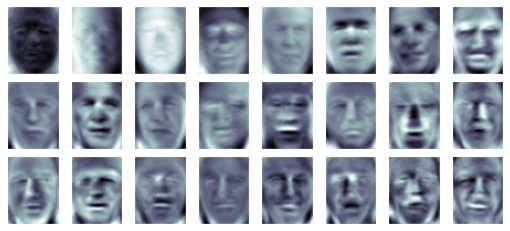

In [17]:
#We plot the components...
fig, axes = plt.subplots(3,8,figsize=(9,4),subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47), cmap='bone')

Text(0, 0.5, 'cumulative explained variance')

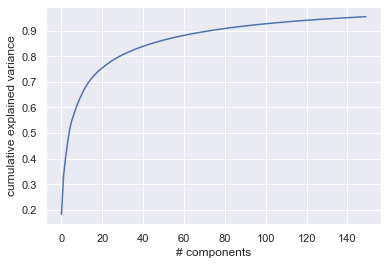

In [18]:
#Considering the explained variance, we see that over 90% of the variance is explained with 150 components. 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

In [19]:
#Let's visualize the projections
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

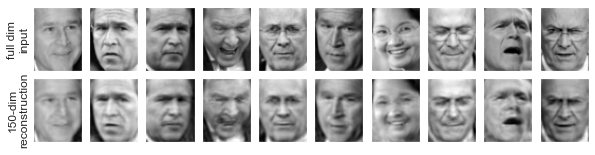

In [20]:
#We see that they are pretty good!
fig, ax = plt.subplots(2,10,figsize=(10,2.5),subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47),cmap='binary_r')
    ax[1,i].imshow(projected[i].reshape(62,47),cmap='binary_r')
    
ax[0,0].set_ylabel('full dim\ninput')
ax[1,0].set_ylabel('150-dim\nreconstruction')

In [58]:
#Challenge 3: You can access the class labels for the faces via faces.target. Use your favorite supervised learning
#method to build a model for predicting faces (use a train-test split). Compare the results on the original faces
# and the PCA projection.

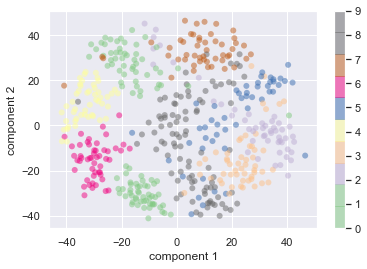

In [24]:
#Now let's try some other methods for projecting digits to 2D. First we look at MDS
from sklearn.manifold import MDS
#We need to turn the data into a distance matrix
from scipy.spatial import distance
D = distance.cdist(digits.data, digits.data, 'euclidean')
#MDS is slow, so we'll only use the first 500 points
embedding = MDS(n_components=2)
digitsMDS = embedding.fit_transform(digits.data[:500])

#Let's plot the 2-d projection
plt.scatter(digitsMDS[:,0], digitsMDS[:,1], c = digits.target[:500], edgecolor='none', alpha = 0.5, cmap=plt.cm.get_cmap('Accent',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

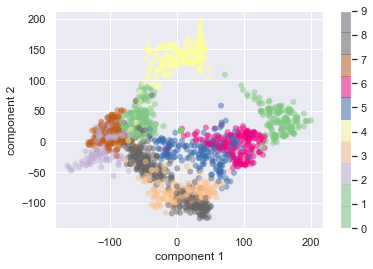

In [27]:
#Now let's try isomap
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
digitsIso = embedding.fit_transform(digits.data)

#Let's plot the 2-d projection
plt.scatter(digitsIso[:,0], digitsIso[:,1], c = digits.target, edgecolor='none', alpha = 0.5, cmap=plt.cm.get_cmap('Accent',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

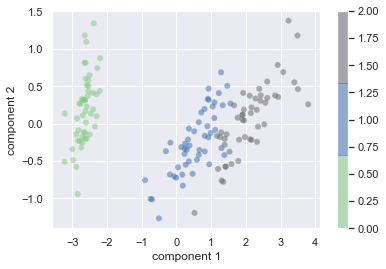

In [31]:
#Now let's try MDS and Isomap on some Iris data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
pca = PCA(2)
projected = pca.fit_transform(X)
#Let's plot the 2-d projection
plt.scatter(projected[:,0], projected[:,1], c = y, edgecolor='none', alpha = 0.5, cmap=plt.cm.get_cmap('Accent',3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [ ]:
#Challenge 4: Try MDS and Isomap on the Iris dataset.